# Word2Vec(Gensim)

In [16]:
!pip install gensim

In [0]:
import gensim
import matplotlib.font_manager as fm
import matplotlib
import matplotlib.pyplot as plt

In [0]:
samples = ["창욱은 영화를 좋아한다",
          "창욱은 도서관을 좋아한다",
          "창욱은 공부를 좋아한다",
          "창욱은 축구를 좋아한다",
          "창욱은 수영을 좋아한다",
          "창욱은 야구를 좋아한다",
          "중현은 영화를 싫어한다", 
          "중현은 도서관을 싫어한다",
          "중현은 공부를 싫어한다", 
          "중현은 축구를 싫어한다", 
          "중현은 수영을 싫어한다", 
          "중현은 야구를 싫어한다"]

In [19]:
token_sentences = []

token_sentences = [" ".join(samples).split()]
word_list = " ".join(samples).split()
word_list = list(set(word_list))

print("token_sentences : %s "%token_sentences)
print("word_list : %s" %word_list)

token_sentences : [['창욱은', '영화를', '좋아한다', '창욱은', '도서관을', '좋아한다', '창욱은', '공부를', '좋아한다', '창욱은', '축구를', '좋아한다', '창욱은', '수영을', '좋아한다', '창욱은', '야구를', '좋아한다', '중현은', '영화를', '싫어한다', '중현은', '도서관을', '싫어한다', '중현은', '공부를', '싫어한다', '중현은', '축구를', '싫어한다', '중현은', '수영을', '싫어한다', '중현은', '야구를', '싫어한다']] 
word_list : ['도서관을', '싫어한다', '축구를', '공부를', '좋아한다', '수영을', '중현은', '창욱은', '영화를', '야구를']


In [0]:
model = gensim.models.Word2Vec(token_sentences, min_count=1, size=2)

In [0]:
model.init_sims(replace=True)

In [22]:
model.wv.most_similar(u'창욱은')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('공부를', 0.9793548583984375),
 ('야구를', 0.9244117140769958),
 ('영화를', 0.7023016214370728),
 ('좋아한다', 0.04689359664916992),
 ('싫어한다', -0.045181840658187866),
 ('도서관을', -0.056841880083084106),
 ('수영을', -0.4915430545806885),
 ('중현은', -0.6803770065307617),
 ('축구를', -0.9534066319465637)]

In [23]:
model.wv.most_similar(u'중현은')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('수영을', 0.9726500511169434),
 ('축구를', 0.8697718977928162),
 ('도서관을', 0.770351231098175),
 ('영화를', 0.0438796803355217),
 ('야구를', -0.34943774342536926),
 ('창욱은', -0.6803770661354065),
 ('싫어한다', -0.7013731598854065),
 ('좋아한다', -0.7639613747596741),
 ('공부를', -0.8144774436950684)]

In [43]:
vocab = list(model.wv.vocab)
word_list = model[vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [44]:
model.wv.vocab

{'공부를': <gensim.models.keyedvectors.Vocab at 0x7f238b035128>,
 '도서관을': <gensim.models.keyedvectors.Vocab at 0x7f238b035ac8>,
 '수영을': <gensim.models.keyedvectors.Vocab at 0x7f238b035d68>,
 '싫어한다': <gensim.models.keyedvectors.Vocab at 0x7f238d246278>,
 '야구를': <gensim.models.keyedvectors.Vocab at 0x7f238b035240>,
 '영화를': <gensim.models.keyedvectors.Vocab at 0x7f238b035ba8>,
 '좋아한다': <gensim.models.keyedvectors.Vocab at 0x7f238b035668>,
 '중현은': <gensim.models.keyedvectors.Vocab at 0x7f238b0efb38>,
 '창욱은': <gensim.models.keyedvectors.Vocab at 0x7f238b035710>,
 '축구를': <gensim.models.keyedvectors.Vocab at 0x7f238b035e80>}

In [45]:
word_list

array([[-0.7035278 ,  0.7106677 ],
       [ 0.01182105,  0.99993014],
       [-0.74287695, -0.6694281 ],
       [ 0.74950856,  0.66199464],
       [-0.83266366,  0.553779  ],
       [ 0.88514817, -0.46530932],
       [ 0.9647015 ,  0.26334563],
       [-0.37930346,  0.92527235],
       [ 0.9994857 ,  0.03206694],
       [-0.6781553 , -0.73491865]], dtype=float32)

### 한글 폰드 설정

In [27]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  
font_name = fm.FontProperties(fname=path, size=10).get_name() 
print(font_name)
plt.rc('font', family=font_name)

NanumGothic Eco


In [0]:
fm._rebuild()

In [0]:
matplotlib.rcParams['axes.unicode_minus'] = False

### 임베딩 그림 그리기

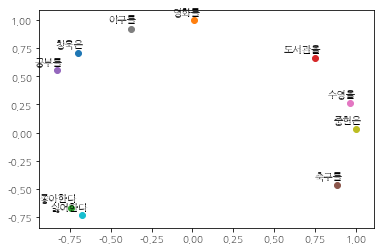

In [30]:
for i, label in enumerate(vocab):
    x, y = word_list[i]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(6, 4),
                 textcoords='offset points', ha='right', va='bottom')

plt.show()

### gensim model Save/Load 

In [0]:
model.save('gensim.model')

In [0]:
model = gensim.models.Word2Vec.load('gensim.model')

### Tensorflow  embedding lookup 이해하기

In [49]:
samples = ["창욱은 영화를 좋아한다",
          "창욱은 도서관을 좋아한다",
          "창욱은 공부를 좋아한다",
          "창욱은 축구를 좋아한다",
          "창욱은 수영을 좋아한다",
          "창욱은 야구를 좋아한다",
          "중현은 영화를 싫어한다", 
          "중현은 도서관을 싫어한다",
          "중현은 공부를 싫어한다", 
          "중현은 축구를 싫어한다", 
          "중현은 수영을 싫어한다", 
          "중현은 야구를 싫어한다"]

token_sentences = []

for sentence in samples:
  token_sentences.append(sentence.split())

print("token_sentences : %s " %token_sentences)
word_list_s = " ".join(samples).split()
word_list_s = list(set(word_list_s))

print("word_list : %s" %word_list_s)


token_sentences : [['창욱은', '영화를', '좋아한다'], ['창욱은', '도서관을', '좋아한다'], ['창욱은', '공부를', '좋아한다'], ['창욱은', '축구를', '좋아한다'], ['창욱은', '수영을', '좋아한다'], ['창욱은', '야구를', '좋아한다'], ['중현은', '영화를', '싫어한다'], ['중현은', '도서관을', '싫어한다'], ['중현은', '공부를', '싫어한다'], ['중현은', '축구를', '싫어한다'], ['중현은', '수영을', '싫어한다'], ['중현은', '야구를', '싫어한다']] 
word_list : ['도서관을', '싫어한다', '축구를', '공부를', '좋아한다', '수영을', '중현은', '창욱은', '영화를', '야구를']


In [50]:
char_to_int = dict((c, i) for i, c in enumerate(word_list_s))
char_to_int

{'공부를': 3,
 '도서관을': 0,
 '수영을': 5,
 '싫어한다': 1,
 '야구를': 9,
 '영화를': 8,
 '좋아한다': 4,
 '중현은': 6,
 '창욱은': 7,
 '축구를': 2}

In [51]:
int_to_char = dict((i, c) for i, c in enumerate(word_list_s))
int_to_char

{0: '도서관을',
 1: '싫어한다',
 2: '축구를',
 3: '공부를',
 4: '좋아한다',
 5: '수영을',
 6: '중현은',
 7: '창욱은',
 8: '영화를',
 9: '야구를'}

In [52]:
integer_encoded = []
for token_sentence in token_sentences:
  integer_encoded.append([char_to_int[char] for char in token_sentence])  
  
print(integer_encoded)

[[7, 8, 4], [7, 0, 4], [7, 3, 4], [7, 2, 4], [7, 5, 4], [7, 9, 4], [6, 8, 1], [6, 0, 1], [6, 3, 1], [6, 2, 1], [6, 5, 1], [6, 9, 1]]


In [53]:
import tensorflow as tf
onehot_encode = tf.nn.embedding_lookup(word_list, integer_encoded)

with tf.Session() as sess:
  print(onehot_encode.eval())

[[[-0.37930346  0.92527235]
  [ 0.9994857   0.03206694]
  [-0.83266366  0.553779  ]]

 [[-0.37930346  0.92527235]
  [-0.7035278   0.7106677 ]
  [-0.83266366  0.553779  ]]

 [[-0.37930346  0.92527235]
  [ 0.74950856  0.66199464]
  [-0.83266366  0.553779  ]]

 [[-0.37930346  0.92527235]
  [-0.74287695 -0.6694281 ]
  [-0.83266366  0.553779  ]]

 [[-0.37930346  0.92527235]
  [ 0.88514817 -0.46530932]
  [-0.83266366  0.553779  ]]

 [[-0.37930346  0.92527235]
  [-0.6781553  -0.73491865]
  [-0.83266366  0.553779  ]]

 [[ 0.9647015   0.26334563]
  [ 0.9994857   0.03206694]
  [ 0.01182105  0.99993014]]

 [[ 0.9647015   0.26334563]
  [-0.7035278   0.7106677 ]
  [ 0.01182105  0.99993014]]

 [[ 0.9647015   0.26334563]
  [ 0.74950856  0.66199464]
  [ 0.01182105  0.99993014]]

 [[ 0.9647015   0.26334563]
  [-0.74287695 -0.6694281 ]
  [ 0.01182105  0.99993014]]

 [[ 0.9647015   0.26334563]
  [ 0.88514817 -0.46530932]
  [ 0.01182105  0.99993014]]

 [[ 0.9647015   0.26334563]
  [-0.6781553  -0.73491865